<a href="https://colab.research.google.com/github/appsstuff/GoldPricePredictionDS/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

# Data visualization
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Data learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gold-price-commodites2024.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
0,04/30/2024,2333.45,63499.0,1.07,82.41,86.98,2.06,4.66,26.95
1,04/29/2024,2357.70,63960.0,1.07,82.63,87.31,2.03,4.68,27.66
2,04/28/2024,2347.45,63226.0,1.07,83.22,87.57,1.95,4.59,27.50
3,04/26/2024,2335.00,63874.0,1.07,83.85,89.50,1.61,4.57,27.40
4,04/25/2024,2330.30,64555.0,1.07,83.57,89.01,1.64,4.53,27.50


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
2588,05/06/2014,1308.6,430.0,1.39,99.50,107.06,4.80,3.06,19.65
2589,05/05/2014,1309.3,427.0,1.39,99.48,107.72,4.69,3.05,19.57
2590,05/02/2014,1302.9,453.5,1.39,99.76,108.59,4.67,3.07,19.55
2591,05/01/2014,1283.4,459.0,1.39,99.42,107.76,4.72,3.02,19.04
2592,04/30/2014,1295.9,448.3,1.39,99.74,108.07,4.82,3.03,19.17


In [ ]:
# number of rows and columns
gold_data.shape

(2593, 9)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2593 non-null   object 
 1   gold    2593 non-null   float64
 2   btc     2592 non-null   float64
 3   eur     2587 non-null   float64
 4   coil    2592 non-null   float64
 5   boil    2581 non-null   float64
 6   gas     2592 non-null   float64
 7   copper  2566 non-null   float64
 8   sliver  2576 non-null   float64
dtypes: float64(8), object(1)
memory usage: 182.4+ KB


In [ ]:
# checking the number of missing values
# Fill null values with a constant
gold_data = gold_data.fillna(0)

# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# gold_data['btc']      = imputer.fit_transform(gold_data['btc'].to_numpy().reshape(-1,1))
# gold_data['coil']     = imputer.fit_transform(gold_data['coil'].to_numpy().reshape(-1,1))
# gold_data['boil']     = imputer.fit_transform(gold_data['boil'].to_numpy().reshape(-1,1))
# gold_data['gas']      = imputer.fit_transform(gold_data['gas'].to_numpy().reshape(-1,1))
# gold_data['copper']   = imputer.fit_transform(gold_data['copper'].to_numpy().reshape(-1,1))
# gold_data['sliver']   = imputer.fit_transform(gold_data['sliver'].to_numpy().reshape(-1,1))
gold_data['Date']     = pd.to_datetime(gold_data['Date'])
gold_data.isnull().sum()


Date      0
gold      0
btc       0
eur       0
coil      0
boil      0
gas       0
copper    0
sliver    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
count,2593,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000
mean,2019-05-05 09:26:26.887774720,1524.063768,15481.965870,1.131404,63.124828,67.310995,3.227127,3.121759,19.219927
min,2014-04-30 00:00:00,1049.600000,0.000000,0.000000,-37.630000,0.000000,0.000000,0.000000,0.000000
25%,2016-10-31 00:00:00,1250.300000,707.800000,1.090000,48.620000,51.740000,2.500000,2.620000,16.220000
50%,2019-05-08 00:00:00,1349.900000,8211.200000,1.120000,59.700000,65.210000,2.820000,2.980000,17.800000
75%,2021-11-09 00:00:00,1818.700000,26264.000000,1.170000,75.890000,80.780000,3.420000,3.760000,23.060000
max,2024-04-30 00:00:00,2401.400000,72974.000000,1.390000,123.700000,127.980000,9.650000,4.940000,29.420000
std,NaN,317.515461,17701.123874,0.089052,19.599628,20.537941,1.406787,0.784194,4.224792


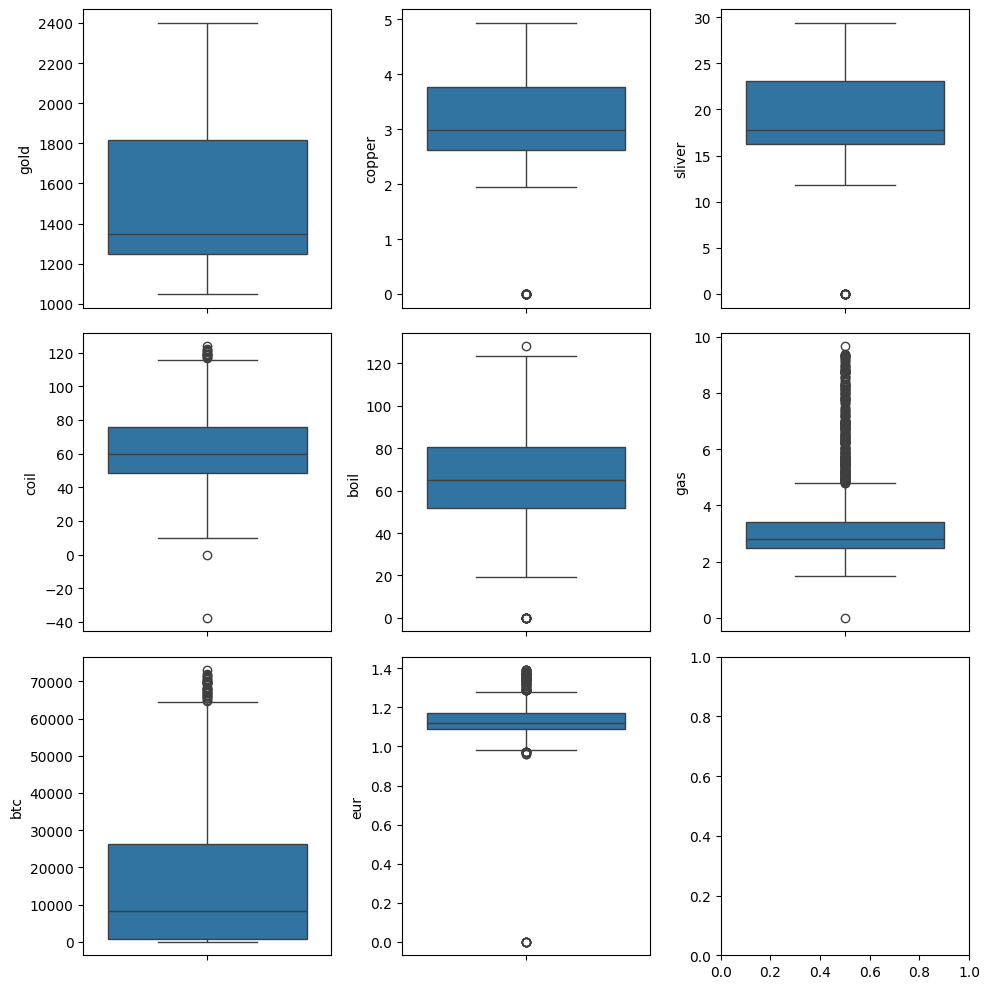

In [ ]:
'''
Detect Outliers
Outliers are extreme values that fall a long way outside of the other observations.
Created the separate function to detect outliers for the dataset. Here used the boxplot using Seaborn library
'''

# gold_dataTest = gold_data;
# gold_dataTest['copper'] = ((gold_dataTest['copper']/(gold_dataTest['copper']) + gold_dataTest['gold']))  * gold_dataTest['gold']*100
# gold_dataTest['sliver'] = ((gold_dataTest['sliver']/(gold_dataTest['sliver']) + gold_dataTest['gold']))*gold_dataTest['gold']*100
# gold_dataTest['coil'] = ((gold_dataTest['coil']/(gold_dataTest['coil']) + gold_dataTest['gold']))*gold_dataTest['gold']*100
# gold_dataTest['boil'] = ((gold_dataTest['boil']/(gold_dataTest['boil']) + gold_dataTest['gold']))*gold_dataTest['gold']*100
# gold_dataTest['gas'] = ((gold_dataTest['gas']/(gold_dataTest['gas']) + gold_dataTest['gold']))*gold_dataTest['gold']*100
# gold_dataTest['btc'] = ((gold_dataTest['btc']/(gold_dataTest['btc']) + gold_dataTest['gold']))*gold_dataTest['gold']*100
# gold_dataTest['eur'] = ((gold_dataTest['eur']/(gold_dataTest['eur']) + gold_dataTest['gold']))*gold_dataTest['gold']*100

def detectOutliers():
    fig, axs = plt.subplots(3,3, figsize = (10,10))
    plt1 = sns.boxplot(gold_data['gold'],   ax = axs[0,0])
    plt2 = sns.boxplot(gold_data['copper'], ax = axs[0,1])
    plt3 = sns.boxplot(gold_data['sliver'], ax = axs[0,2])

    plt1 = sns.boxplot(gold_data['coil'],   ax = axs[1,0])
    plt2 = sns.boxplot(gold_data['boil'],   ax = axs[1,1])
    plt3 = sns.boxplot(gold_data['gas'],    ax = axs[1,2])

    plt1 = sns.boxplot(gold_data['btc'],    ax = axs[2,0])
    plt2 = sns.boxplot(gold_data['eur'],    ax = axs[2,1])
    plt.tight_layout()
detectOutliers()


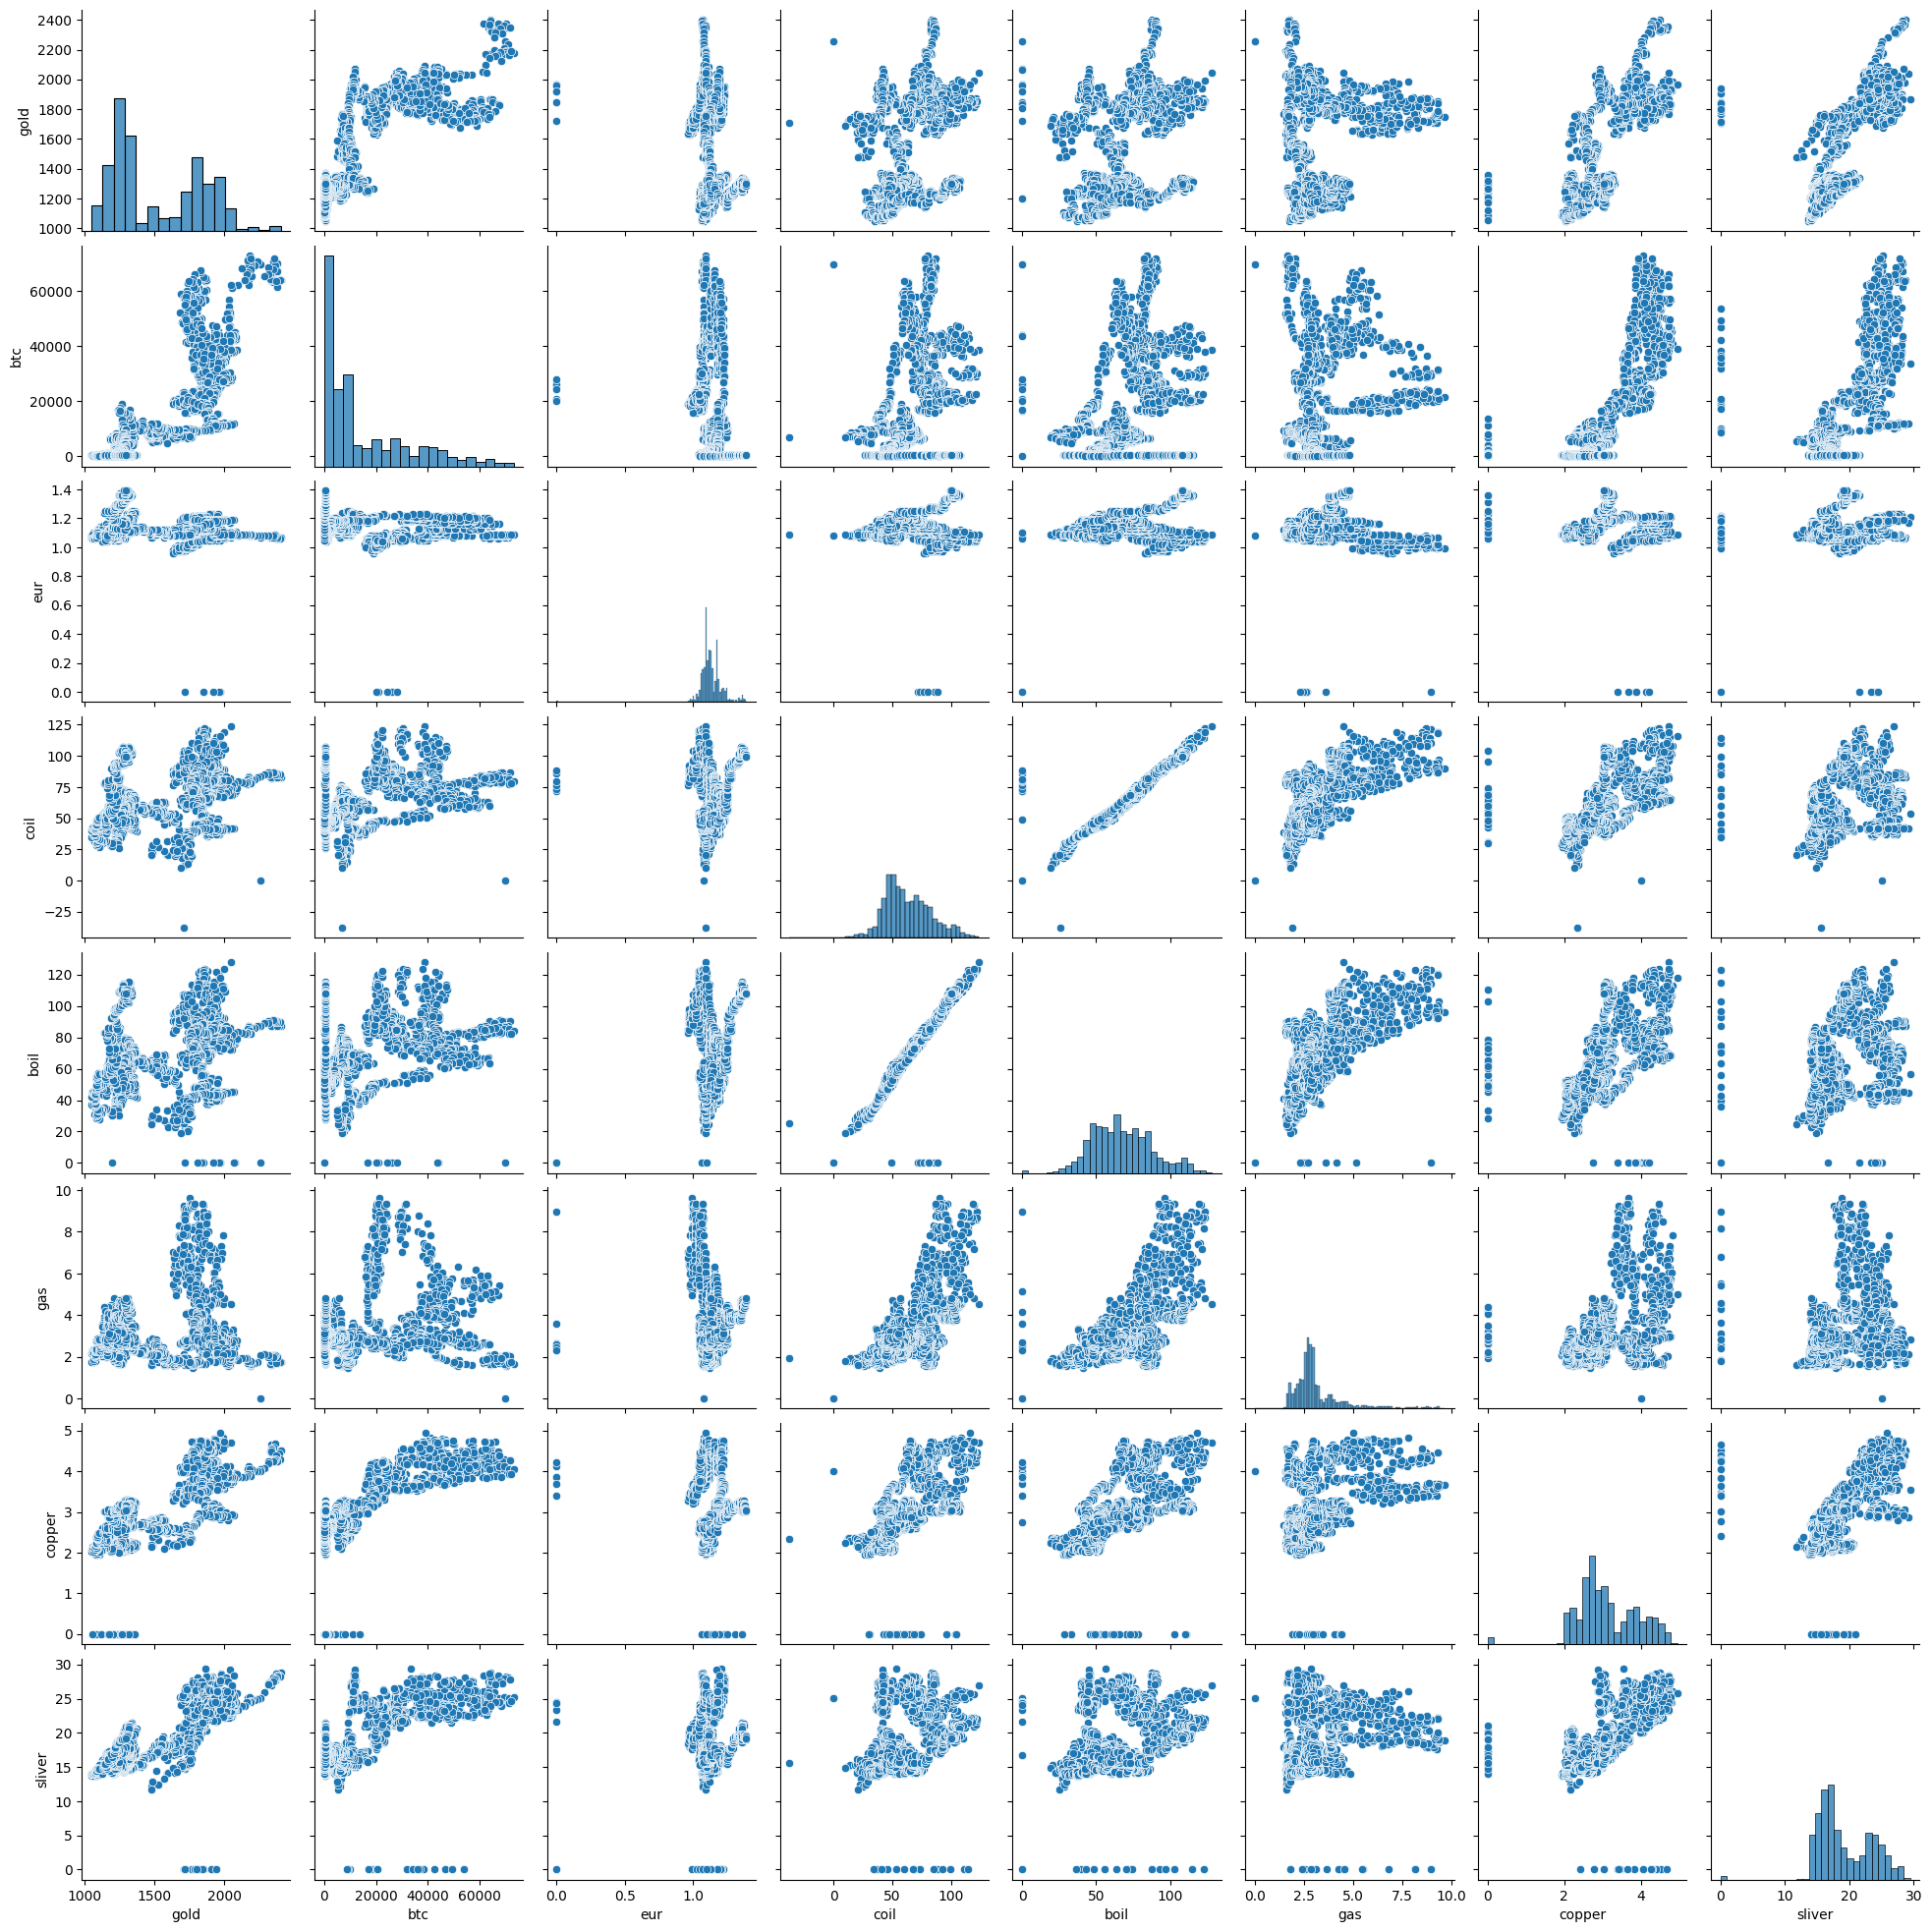

In [ ]:
sns.pairplot(gold_data)
plt.show()

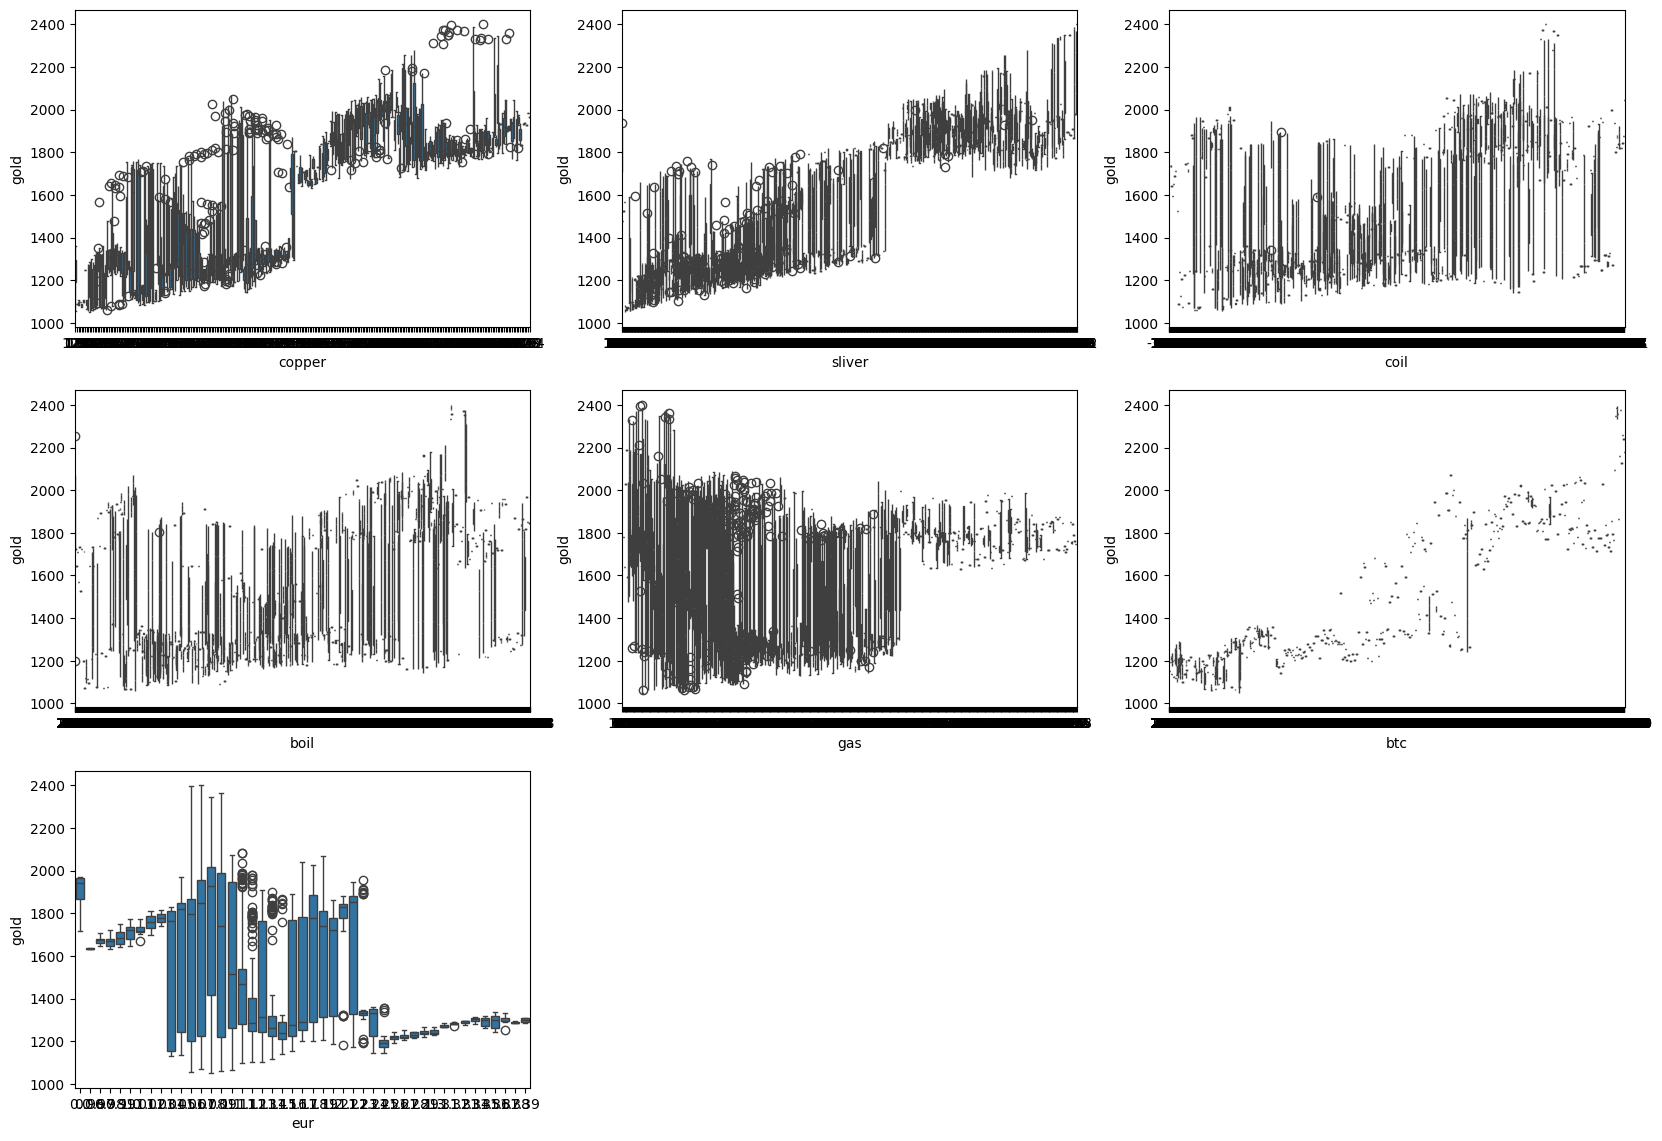

In [ ]:
plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.boxplot(x='copper', y='gold', data=gold_data)
plt.subplot(3,3,2)
sns.boxplot(x='sliver', y='gold', data=gold_data)
plt.subplot(3,3,3)
sns.boxplot(x='coil', y='gold', data=gold_data)
plt.subplot(3,3,4)
sns.boxplot(x='boil', y='gold', data=gold_data)
plt.subplot(3,3,5)
sns.boxplot(x='gas', y='gold', data=gold_data)
plt.subplot(3,3,6)
sns.boxplot(x='btc', y='gold', data=gold_data)
plt.subplot(3,3,7)
sns.boxplot(x='eur', y='gold', data=gold_data)
plt.show()


<ipython-input-44-1580830dbea2>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  series1=sns.lineplot(x='Date',y='value',data=dataDF , palette=['red', 'blue'])


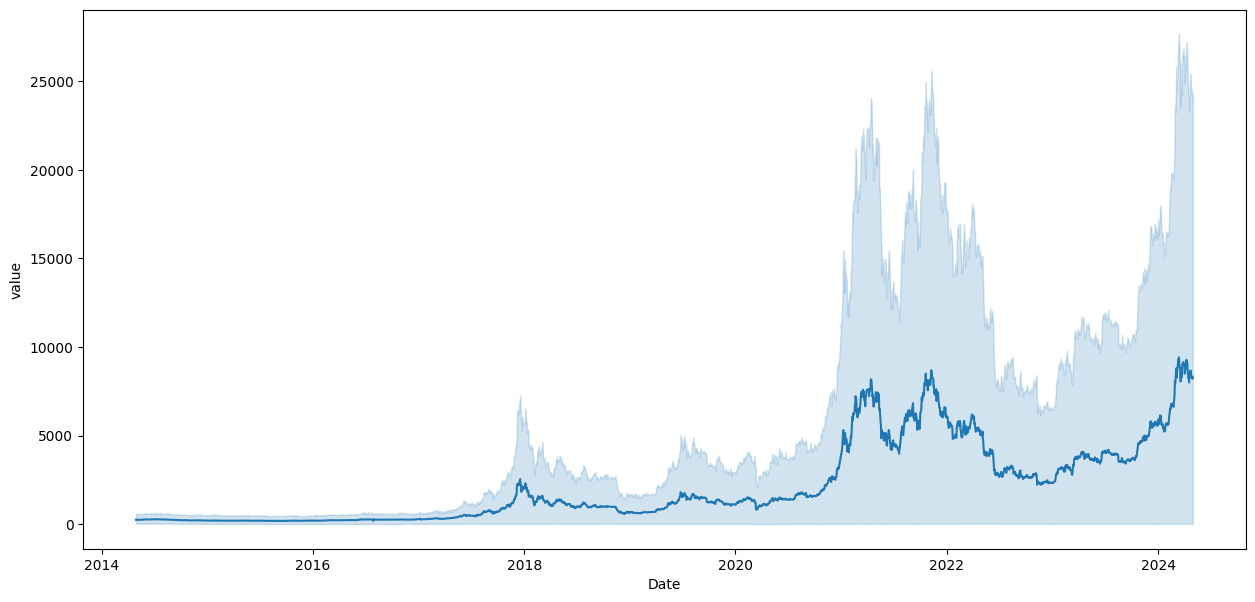

In [ ]:
plt.figure(figsize=(15,7))
dataDF=pd.melt(gold_data, ['Date'])
series1=sns.lineplot(x='Date',y='value',data=dataDF , palette=['red', 'blue'])



In [ ]:
from plotnine import *
ggplot(dataDF, aes('weight', 'hindfoot_length')) + geom_point()

Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
df_commoidates = gold_data.drop(['Date'],axis=1)
correlation = df_commoidates.corr()

<Axes: >

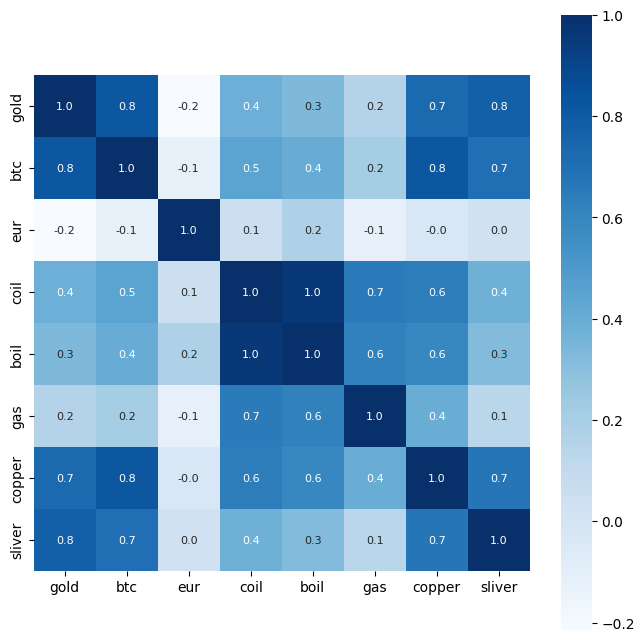

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['gold'])

gold      1.000000
btc       0.815529
eur      -0.216210
coil      0.386263
boil      0.332238
gas       0.156357
copper    0.732529
sliver    0.776556
Name: gold, dtype: float64


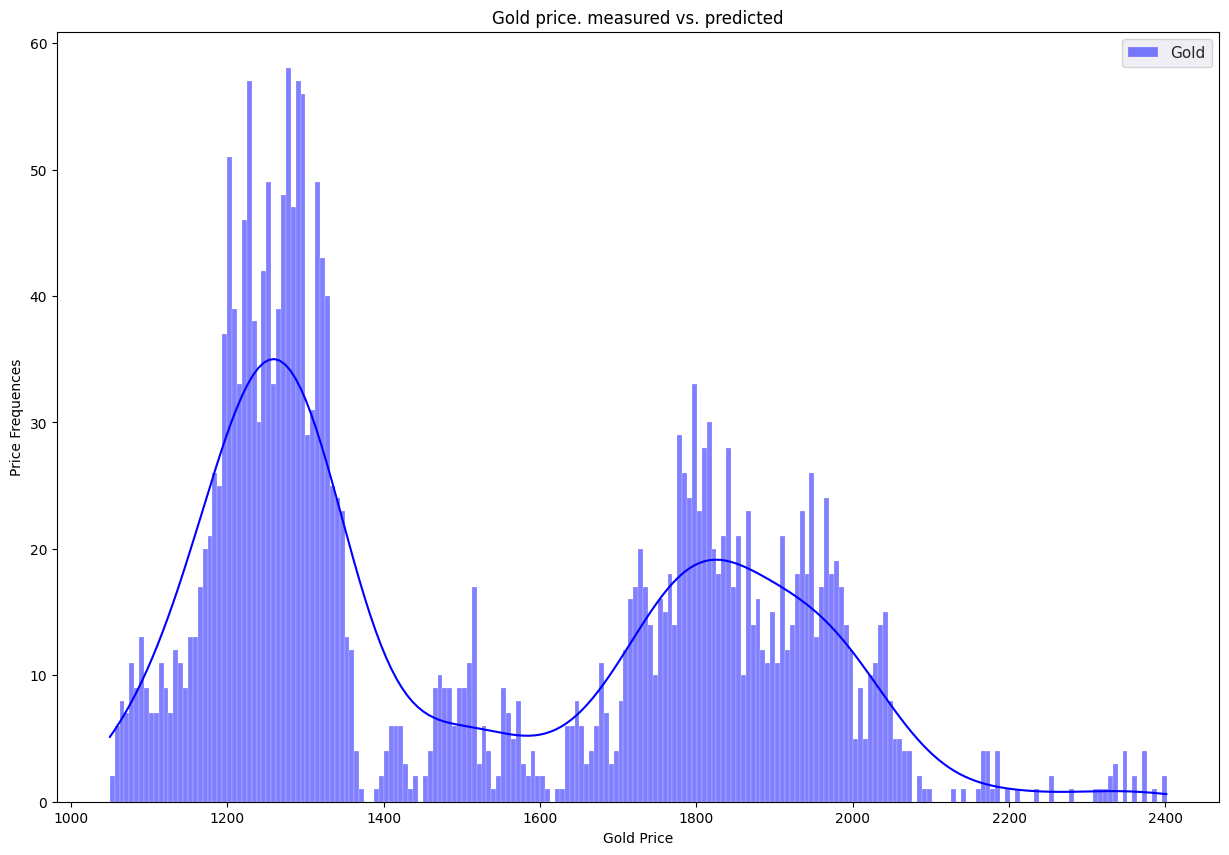

In [ ]:
# checking the distribution of the GLD Price
plt.style.use('tableau-colorblind10')
plt.title('Gold price. measured vs. predicted')
sns.set_theme()
binsLength = int(len(gold_data)/12)
ax = sns.histplot(data= gold_data['gold'], bins=binsLength , kde=True, color='Blue', label='Gold')

ax.set(xlabel="Gold Price")
ax.set(ylabel="Price Frequences")
ax.set_axisbelow(True)

ax.figure.set_size_inches(15, 10)

# sns.histplot(x1 , bins=60,  color='red', kde=True, label='pred')
# sns.histplot(y1 , bins=60,  color='Blue', kde=True, label='measured')
plt.legend()

Splitting the Features and Target

In [ ]:
gold_data = gold_data.fillna(0)
dFram_withoutGoldX = gold_data.drop(['Date','gold'],axis=1)
dFram_OnlyGoldY = gold_data['gold']

In [ ]:
print(dFram_withoutGoldX)

          btc   eur   coil    boil   gas  copper  sliver
0     63499.0  1.07  82.41   86.98  2.06    4.66   26.95
1     63960.0  1.07  82.63   87.31  2.03    4.68   27.66
2     63226.0  1.07  83.22   87.57  1.95    4.59   27.50
3     63874.0  1.07  83.85   89.50  1.61    4.57   27.40
4     64555.0  1.07  83.57   89.01  1.64    4.53   27.50
...       ...   ...    ...     ...   ...     ...     ...
2588    430.0  1.39  99.50  107.06  4.80    3.06   19.65
2589    427.0  1.39  99.48  107.72  4.69    3.05   19.57
2590    453.5  1.39  99.76  108.59  4.67    3.07   19.55
2591    459.0  1.39  99.42  107.76  4.72    3.02   19.04
2592    448.3  1.39  99.74  108.07  4.82    3.03   19.17

[2593 rows x 7 columns]


In [ ]:
print(dFram_OnlyGoldY)

0       2333.45
1       2357.70
2       2347.45
3       2335.00
4       2330.30
         ...   
2588    1308.60
2589    1309.30
2590    1302.90
2591    1283.40
2592    1295.90
Name: gold, Length: 2593, dtype: float64


Splitting into Training data and Test Data

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(dFram_withoutGoldX, dFram_OnlyGoldY, test_size = 0.2, random_state=0)


Model Training:

> Add blockquote


Random Forest Regressor

In [ ]:
randomForest_regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model

randomForest_regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
randomForest_regressor_predictor = randomForest_regressor.predict(X_test)

In [ ]:
print(randomForest_regressor_predictor)

[1932.3825 1250.803  1719.209  1167.242  1595.325  2024.394  1773.234
 1224.269  1676.324  1257.892  1213.406  1790.026  1727.796  1927.423
 1973.77   2033.638  1302.598  1955.342  1879.602  1934.7125 1276.317
 1938.3915 1406.451  1360.696  1781.951  1285.924  1325.548  1238.229
 1474.914  1988.3295 1261.317  1189.494  1732.647  1286.477  1081.446
 1890.322  1091.962  1970.065  1099.202  1062.824  1378.844  1191.705
 1959.1335 1844.239  1781.703  1777.295  1262.307  1294.249  1196.043
 1827.1335 1234.839  1340.368  1292.526  1345.345  2188.491  1139.554
 1756.873  1304.866  1323.313  1795.091  1192.173  1210.843  1288.37
 1891.923  1225.865  1295.991  1661.662  1748.181  1225.368  1255.765
 1928.77   1247.896  2002.94   1414.386  1318.933  1329.865  1271.661
 1299.565  1253.149  1272.434  1234.499  1291.805  1956.997  1824.45
 1866.363  1174.26   1212.537  1256.484  1931.6085 1295.245  1067.928
 1224.33   1202.65   1321.829  1674.478  1691.999  1249.655  1197.835
 1500.653  1814.059  1

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, randomForest_regressor_predictor)
print("R squared error : ", error_score)

R squared error :  0.9960795765784494


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

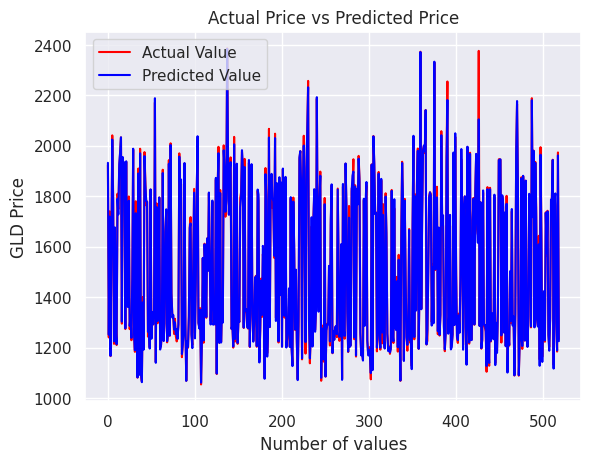

In [ ]:
plt.plot(Y_test, color='red',                label = 'Actual Value')
plt.plot(randomForest_regressor_predictor, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

R squared error :  0.7745292966260391


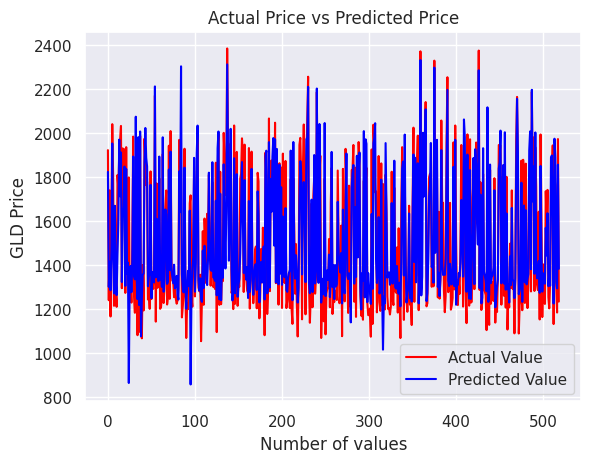

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Build the regression model
liner_regressor = LinearRegression()
liner_regressor.fit(X_train, Y_train)

# Make predictions
liner_regressor_predictor = liner_regressor.predict(X_test)

# Evaluate the model performance
error_score = metrics.r2_score(Y_test, liner_regressor_predictor)
print("R squared error : ", error_score)

Y_test = list(Y_test)
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(liner_regressor_predictor, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y_train)

# logreg=LogisticRegression()
logreg=LogisticRegression.fit(X_train, y_transformed)
# logreg.fit(X_train,y_transformed)
# logisticRegression_predictor = logreg.predict(X_test)

# accuracy=accuracy_score(X_test,logisticRegression_predictor)
# print(accuracy)

TypeError: LogisticRegression.fit() missing 1 required positional argument: 'y'